# Stellar Association Properties

In [1]:
# imports
from astropy.io import ascii
from astropy import units as u

import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

import re
import pyperclip

CUTOFF = 2 * u.km / u.s

### Retrieve Data

In [2]:
# table 1
table1 = pd.read_table("gagne2018Table1.dat",index_col = False)
table1

,Asso.,N,$\mathrm{ln}{\alpha }_{k}$ ^b,Unnamed: 3,Unnamed: 4,Unnamed: 5,$\langle \varpi \rangle $ ^c,$\langle \nu \rangle $ ^d,S_spa^e,S_kin^f,Age,Age.1,Unnamed: 12
0,118TAU,10,-17.22,-18.60,-21.37,-22.66,100 +or- 10,14 +or- 2,3.4,2.1,~10,1,NaN
1,ABDMG,48,-14.11,-15.39,-16.56,-17.60,${30}_{-10}^{+20}$,${10}_{-20}^{+10}$,19.0,1.4,${149}_{-19}^{+51}$,2,NaN
2,betaPMG,42,-13.57,-14.77,-17.39,-18.24,${30}_{-10}^{+20}$,10 +or- 10,14.8,1.4,24 +or- 3,2,NaN
3,CAR,7,-13.41,-14.82,-18.45,-19.15,60 +or- 20,20 +or- 2,11.8,0.8,${45}_{-7}^{+11}$,2,NaN
4,CARN,13,-15.51,-16.85,-17.64,-18.55,30 +or- 20,${15}_{-10}^{+7}$,14.0,2.1,~200,3,NaN
5,CBER,40,-13.70,-15.09,-22.32,-23.43,${85}_{-5}^{+4}$,-0.1 +or- 0.8,3.6,0.5,${562}_{-84}^{+98}$,4,NaN
6,COL,23,-13.08,-14.10,-17.74,-18.34,50 +or- 20,${21}_{-8}^{+3}$,15.8,0.9,${42}_{-4}^{+6}$,2,NaN
7,CRA,12,-17.55,-19.07,-21.89,-22.89,139 +or- 4,-1 +or- 1,1.5,1.7,4-5,5,NaN
8,EPSC,25,-17.47,-18.59,-22.38,-22.79,102 +or- 4,14 +or- 3,2.8,1.8,${3.7}_{-1.4}^{+4.6}$,6,NaN
9,ETAC,16,-20.19,-21.36,-25.75,-26.22,95 +or- 1,20 +or- 3,0.6,2.0,11 +or- 3,2,NaN


In [3]:
# table 9
table9 = pd.read_table("gagne2018Table9.dat",index_col = False)
table9

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55
0,118TAU,-102.30,-4.80,-9.90,-12.80,-19.10,-9.20,12.70,2.40,1.80,2.10,2.80,1.60
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75
7,CRA,132.45,-0.21,-42.43,-3.70,-15.70,-8.80,3.71,0.75,2.04,1.30,2.20,2.20
8,EPSC,49.90,-84.80,-25.60,-9.90,-19.30,-9.70,2.50,3.60,4.00,1.60,2.20,2.00
9,ETAC,33.65,-81.36,-34.81,-10.00,-22.30,-11.70,0.65,0.98,0.71,1.60,2.80,1.80


In [4]:
table1['Age']

0                       ~10
1       ${149}_{-19}^{+51}$
2                 24 +or- 3
3         ${45}_{-7}^{+11}$
4                      ~200
5       ${562}_{-84}^{+98}$
6          ${42}_{-4}^{+6}$
7                       4-5
8     ${3.7}_{-1.4}^{+4.6}$
9                 11 +or- 3
10             750 +or- 100
11                50 +or- 5
12         ${46}_{-5}^{+6}$
13                15 +or- 3
14                35 +or- 5
15                      ~60
16               112 +or- 5
17                      < 2
18                      1-2
19                45 +or- 4
20         ${22}_{-3}^{+4}$
21                10 +or- 3
22                16 +or- 2
23                      ~10
24              414 +or- 23
25                10 +or- 3
26                     ~500
Name: Age, dtype: object

In [5]:
#reformat age
plus_loc = np.array([age.find('+') for age in table1['Age']])
plus_loc[plus_loc == -1] = 100
#print(plus_loc)

sub_loc = np.array([age.find('_') for age in table1['Age']])
sub_loc[sub_loc == -1] = 100
#print(sub_loc)

error_loc = np.min([plus_loc,sub_loc],axis = 0)
#print(error_loc)

#extract ages from table 1
ages = [age[:error_loc[i]] for i,age in enumerate(table1['Age'])]
print(ages)

ages = [int(re.findall(r'\d+', age)[0]) for age in ages]
ages[8] = 4.5
ages[9] = 3.7
print(ages)

['~10', '${149}', '24 ', '${45}', '~200', '${562}', '${42}', '4-5', '${3.7}', '11 ', '750 ', '50 ', '${46}', '15 ', '35 ', '~60', '112 ', '< 2', '1-2', '45 ', '${22}', '10 ', '16 ', '~10', '414 ', '10 ', '~500']
[10, 149, 24, 45, 200, 562, 42, 4, 4.5, 3.7, 750, 50, 46, 15, 35, 60, 112, 2, 1, 45, 22, 10, 16, 10, 414, 10, 500]


In [6]:
# get distances
distances = np.sqrt(table9['X']**2 + table9['Y']**2 + table9['Z']**2)

In [7]:
#put relevant info into one table
data = table9
data['age'] = ages
data['distance'] = distances
data['N'] = table1['N']
data

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N
0,118TAU,-102.30,-4.80,-9.90,-12.80,-19.10,-9.20,12.70,2.40,1.80,2.10,2.80,1.60,10.0,102.889941,10
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80,149.0,12.856127,48
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00,24.0,17.555341,42
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01,45.0,53.248380,7
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00,200.0,28.435717,13
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71,562.0,85.264412,40
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75,42.0,42.421457,23
7,CRA,132.45,-0.21,-42.43,-3.70,-15.70,-8.80,3.71,0.75,2.04,1.30,2.20,2.20,4.0,139.080378,12
8,EPSC,49.90,-84.80,-25.60,-9.90,-19.30,-9.70,2.50,3.60,4.00,1.60,2.20,2.00,4.5,101.668137,25
9,ETAC,33.65,-81.36,-34.81,-10.00,-22.30,-11.70,0.65,0.98,0.71,1.60,2.80,1.80,3.7,94.675806,16


### display data

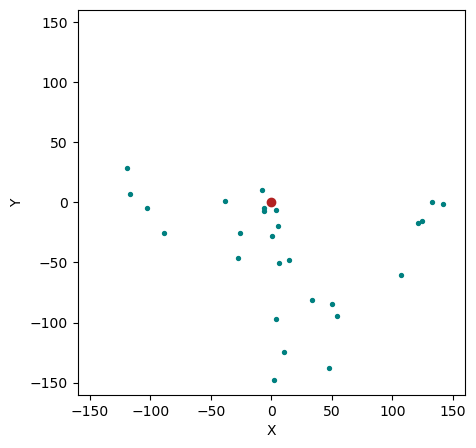

In [8]:
# display locations
plt.figure(figsize=(5,5))
plt.xlim([-160,160])
plt.xlabel('X')

plt.ylim([-160,160])
plt.ylabel('Y')

plt.scatter(0,0,color='firebrick')
plt.scatter(data['X'], data['Y'], color = 'teal', s=8)

plt.show()

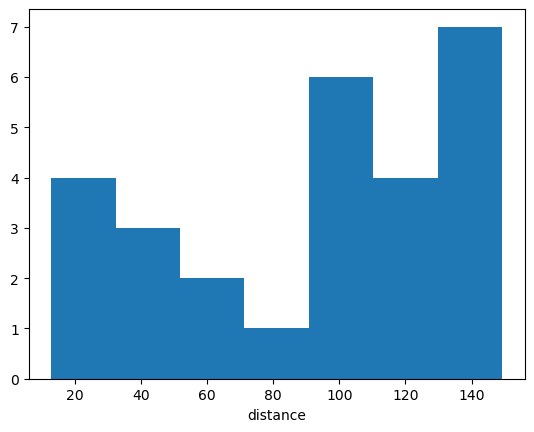

In [9]:
plt.hist(data['distance'],bins=7)
plt.xlabel('distance')
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_36978/3622088958.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.scatter(data['age'], data['distance'], color = 'teal', s=8)


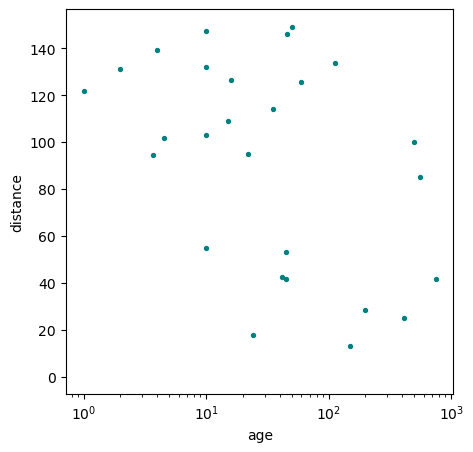

In [10]:
# display locations
plt.figure(figsize=(5,5))

plt.xlabel('age')
plt.ylabel('distance')

plt.xscale('log')

plt.scatter(0,0,color='firebrick')
plt.scatter(data['age'], data['distance'], color = 'teal', s=8)

plt.show()

### Ejection Velocities

In [11]:
# get required eject vel
reqVel = [((data['distance'][i]*u.pc) / (data['age'][i]*u.Myr)).to(u.km/u.second) for i in range(data['name'].size)]

In [12]:
data['reqVel'] = [round(reqVel.value,3) for reqVel in reqVel]

In [13]:
for i in range(data['name'].size):
    print(f"{data['name'][i]} \t {data['reqVel'][i]}")

118TAU 	 10.06
ABDMG 	 0.084
betaPMG 	 0.715
CAR 	 1.157
CARN 	 0.139
CBER 	 0.148
COL 	 0.988
CRA 	 33.998
EPSC 	 22.091
ETAC 	 25.02
HYA 	 0.054
IC2391 	 2.918
IC2602 	 3.105
LCC 	 7.098
OCT 	 3.182
PL8 	 2.049
PLE 	 1.168
ROPH 	 64.152
TAU 	 119.192
THA 	 0.905
THOR 	 4.227
TWA 	 5.354
UCL 	 7.722
UCRA 	 14.414
UMA 	 0.059
USCO 	 12.887
XFOR 	 0.195


In [14]:
#display those with reasonable ejection velocities
data["viable"] = [val < CUTOFF.value for val in data["reqVel"]]
data[data["viable"] == True]

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N,reqVel,viable
1,ABDMG,-6.0,-7.2,-8.8,-7.20,-27.60,-14.20,21.4,20.3,16.3,1.40,1.00,1.80,149.0,12.856127,48,0.084,True
2,betaPMG,4.1,-6.7,-15.7,-10.90,-16.00,-9.00,29.3,14.0,9.0,2.20,1.20,1.00,24.0,17.555341,42,0.715,True
3,CAR,6.7,-50.5,-15.5,-10.66,-21.92,-5.48,10.0,18.1,12.6,0.67,1.02,1.01,45.0,53.248380,7,1.157,True
4,CARN,0.7,-28.1,-4.3,-25.30,-18.10,-2.30,7.8,20.8,17.3,3.20,1.90,2.00,200.0,28.435717,13,0.139,True
5,CBER,-6.0,-5.1,84.9,-2.30,-5.51,-0.61,3.3,3.3,4.5,0.53,0.44,0.71,562.0,85.264412,40,0.148,True
6,COL,-25.9,-25.9,-21.4,-11.90,-21.28,-5.66,12.1,23.0,17.8,1.04,1.29,0.75,42.0,42.421457,23,0.988,True
10,HYA,-38.5,0.8,-15.8,-42.27,-18.79,-1.47,7.4,4.4,2.9,2.01,0.94,1.10,750.0,41.623671,177,0.054,True
16,PLE,-118.9,28.5,-54.4,-6.70,-28.00,-14.00,7.7,3.5,4.2,1.70,1.80,1.20,112.0,133.823839,190,1.168,True
19,THA,5.4,-20.1,-36.1,-9.79,-20.94,-0.99,19.4,12.4,3.8,0.87,0.79,0.72,45.0,41.669893,39,0.905,True
24,UMA,-7.5,9.9,21.9,14.80,1.80,-10.20,3.1,1.5,1.1,1.00,1.20,2.60,414.0,25.176775,9,0.059,True


In [15]:
#sort data by ejection velocity
data = data.sort_values('reqVel')
data

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,cm33,cm44,cm55,age,distance,N,reqVel,viable
10,HYA,-38.50,0.80,-15.80,-42.27,-18.79,-1.47,7.40,4.40,2.90,2.01,0.94,1.10,750.0,41.623671,177,0.054,True
24,UMA,-7.50,9.90,21.90,14.80,1.80,-10.20,3.10,1.50,1.10,1.00,1.20,2.60,414.0,25.176775,9,0.059,True
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,1.40,1.00,1.80,149.0,12.856127,48,0.084,True
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,3.20,1.90,2.00,200.0,28.435717,13,0.139,True
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,0.53,0.44,0.71,562.0,85.264412,40,0.148,True
26,XFOR,-27.10,-46.30,-84.20,-12.54,-22.24,-6.26,4.70,3.80,4.40,0.96,1.41,2.21,500.0,99.838570,11,0.195,True
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,2.20,1.20,1.00,24.0,17.555341,42,0.715,True
19,THA,5.40,-20.10,-36.10,-9.79,-20.94,-0.99,19.40,12.40,3.80,0.87,0.79,0.72,45.0,41.669893,39,0.905,True
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,1.04,1.29,0.75,42.0,42.421457,23,0.988,True
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,0.67,1.02,1.01,45.0,53.248380,7,1.157,True


### Create Latex Table

In [25]:
# create table for overleaf
latex_data = data.loc[:,['name','N','distance','age','reqVel']]
latex_data.columns = ['Name', 'N', '$d$ [pc]', 'Age [Myr]', r'$v_{\text{ej}}$ [km/s]']
#create table with formatting
format_dict = {'Name':str,\
                'N':'{:.0f}',\
                '$d$ [pc]':'{:.0f}',\
                'Age [Myr]':'{:.0f}',\
                r'$v_{\text{ej}}$ [km/s]':'{:.2f}'}
latex_table = latex_data.to_latex(formatters=format_dict, index=False)
print(latex_table)

# to copy latex to clipboard, uncomment this line
pyperclip.copy(latex_table)

\begin{tabular}{lrrrr}
\toprule
Name & N & $d$ [pc] & Age [Myr] & $v_{\text{ej}}$ [km/s] \\
\midrule
HYA & 177 & 42 & 750 & 0.05 \\
UMA & 9 & 25 & 414 & 0.06 \\
ABDMG & 48 & 13 & 149 & 0.08 \\
CARN & 13 & 28 & 200 & 0.14 \\
CBER & 40 & 85 & 562 & 0.15 \\
XFOR & 11 & 100 & 500 & 0.20 \\
betaPMG & 42 & 18 & 24 & 0.71 \\
THA & 39 & 42 & 45 & 0.91 \\
COL & 23 & 42 & 42 & 0.99 \\
CAR & 7 & 53 & 45 & 1.16 \\
PLE & 190 & 134 & 112 & 1.17 \\
PL8 & 11 & 126 & 60 & 2.05 \\
IC2391 & 16 & 149 & 50 & 2.92 \\
IC2602 & 17 & 146 & 46 & 3.10 \\
OCT & 14 & 114 & 35 & 3.18 \\
THOR & 35 & 95 & 22 & 4.23 \\
TWA & 23 & 55 & 10 & 5.35 \\
LCC & 82 & 109 & 15 & 7.10 \\
UCL & 103 & 126 & 16 & 7.72 \\
118TAU & 10 & 103 & 10 & 10.06 \\
USCO & 84 & 132 & 10 & 12.89 \\
UCRA & 10 & 147 & 10 & 14.41 \\
EPSC & 25 & 102 & 4 & 22.09 \\
ETAC & 16 & 95 & 4 & 25.02 \\
CRA & 12 & 139 & 4 & 34.00 \\
ROPH & 186 & 131 & 2 & 64.15 \\
TAU & 122 & 122 & 1 & 119.19 \\
\bottomrule
\end{tabular}



### Calculate ISO Number densities

In [17]:
#LOWER BOUND

#assume all eject at 2 km/s
v_ej = 2 * u.km/u.second
num_per_star = 10**16

#change units for easier calculation
v_ej = v_ej.to(u.pc/u.Myr)

# get total number per association
num_ej = num_per_star*data['N']

#get properties of the ISO spheres
sphere_r = [v_ej*age*u.Myr for age in data['age']]
sphere_vol = [4/3 * math.pi * r**3 for r in sphere_r]
num_density = [(num_ej[i]/vol).to(u.au**-3).value for i,vol in enumerate(sphere_vol)]

data['num_density_lower'] = num_density

for i,assoc in enumerate(data[data['viable']]['name']):
    print(f'{assoc} \t {num_density[i]:.3e}')

HYA 	 7.535e-10
UMA 	 2.150e-08
ABDMG 	 4.036e-07
CARN 	 2.782e-08
CBER 	 2.328e-09
XFOR 	 1.017e-08
betaPMG 	 5.289e-05
THA 	 4.186e-06
COL 	 1.073e-05
CAR 	 5.582e-06
PLE 	 4.005e-06


In [18]:
#UPPER BOUND

#assume all eject at perfect speed to just barely be hitting the sun
num_per_star = 10**16

#change units for easier calculation
v_ej = v_ej.to(u.pc/u.Myr)

# get total number per association
num_ej = num_per_star*data['N']

#get properties of the ISO spheres
sphere_r = [distance*u.pc for distance in data['distance']]
sphere_vol = [4/3 * math.pi * r**3 for r in sphere_r]
num_density = [(num_ej[i]/vol).to(u.au**-3).value for i,vol in enumerate(sphere_vol)]

data['num_density_higher'] = num_density

for i,assoc in enumerate(data[data['viable']]['name']):
    print(f'{assoc} \t {num_density[i]:.3e}')

HYA 	 3.772e-05
UMA 	 8.182e-04
ABDMG 	 5.377e-03
CARN 	 8.282e-05
CBER 	 5.705e-06
XFOR 	 1.093e-05
betaPMG 	 1.156e-03
THA 	 4.512e-05
COL 	 8.909e-05
CAR 	 2.883e-05
PLE 	 2.009e-05


In [19]:
# FLUX-LIKE

num_per_star = 10**16
total_num = num_per_star * data['N']

# the ISO locations can be approximated by the associations' stars ejecting ISOs constantly since birth
# lets think of this ejection as analogous to luminosity
ISO_luminosity = [total_num[i]/(age*u.Myr) for i,age in enumerate(data['age'])]

#can imagine a flux of ISOs at sun's radius
ISO_flux = [ISO_luminosity[i]/(4*math.pi*(dist*u.pc)**2) for i,dist in enumerate(data['distance'])]

# because all particles move at same speed, flux relates to density with
#num_dens = [(flux/v_ej).to(u.au**-3).value for flux in ISO_flux]
num_dens = [flux.value for flux in ISO_flux]

data['num_density_flux'] = num_dens

for i,assoc in enumerate(data[data['viable']]['name']):
    print(f'{assoc} \t {num_dens[i]:.3e}')

HYA 	 6.124e+09
UMA 	 1.456e+11
ABDMG 	 1.357e+12
CARN 	 3.445e+10
CBER 	 2.532e+09
XFOR 	 6.387e+09
betaPMG 	 2.475e+12
THA 	 1.222e+11
COL 	 2.632e+11
CAR 	 9.979e+10
PLE 	 7.022e+10


In [20]:
data

,name,X,Y,Z,U,V,W,cm00,cm11,cm22,...,cm44,cm55,age,distance,N,reqVel,viable,num_density_lower,num_density_higher,num_density_flux
10,HYA,-38.50,0.80,-15.80,-42.27,-18.79,-1.47,7.40,4.40,2.90,...,0.94,1.10,750.0,41.623671,177,0.054,True,7.535324e-10,3.772375e-05,6.124182e+09
24,UMA,-7.50,9.90,21.90,14.80,1.80,-10.20,3.10,1.50,1.10,...,1.20,2.60,414.0,25.176775,9,0.059,True,2.150433e-08,8.182329e-04,1.455562e+11
1,ABDMG,-6.00,-7.20,-8.80,-7.20,-27.60,-14.20,21.40,20.30,16.30,...,1.00,1.80,149.0,12.856127,48,0.084,True,4.036233e-07,5.377183e-03,1.357166e+12
4,CARN,0.70,-28.10,-4.30,-25.30,-18.10,-2.30,7.80,20.80,17.30,...,1.90,2.00,200.0,28.435717,13,0.139,True,2.781594e-08,8.282119e-05,3.444529e+10
5,CBER,-6.00,-5.10,84.90,-2.30,-5.51,-0.61,3.30,3.30,4.50,...,0.44,0.71,562.0,85.264412,40,0.148,True,2.328199e-09,5.705266e-06,2.531988e+09
26,XFOR,-27.10,-46.30,-84.20,-12.54,-22.24,-6.26,4.70,3.80,4.40,...,1.41,2.21,500.0,99.838570,11,0.195,True,1.017269e-08,1.093455e-05,6.386802e+09
2,betaPMG,4.10,-6.70,-15.70,-10.90,-16.00,-9.00,29.30,14.00,9.00,...,1.20,1.00,24.0,17.555341,42,0.715,True,5.289077e-05,1.156474e-03,2.474504e+12
19,THA,5.40,-20.10,-36.10,-9.79,-20.94,-0.99,19.40,12.40,3.80,...,0.79,0.72,45.0,41.669893,39,0.905,True,4.186291e-06,4.511802e-05,1.222121e+11
6,COL,-25.90,-25.90,-21.40,-11.90,-21.28,-5.66,12.10,23.00,17.80,...,1.29,0.75,42.0,42.421457,23,0.988,True,1.072699e-05,8.908801e-05,2.632144e+11
3,CAR,6.70,-50.50,-15.50,-10.66,-21.92,-5.48,10.00,18.10,12.60,...,1.02,1.01,45.0,53.248380,7,1.157,True,5.581722e-06,2.882948e-05,9.978949e+10


### New Latex Table

In [21]:
#create table with formatting
latex_data = data[data['viable']].loc[:,['name','num_density_lower','num_density_higher','num_density_flux']]
latex_data.columns = ['Name', r'$n_{\text{age}}$ [au^3]', r'$n_{\text{dist}}$ [au^3]', r'$n_{\text{flux}}$ [au^3]']

format_dict = {latex_data.columns[0]:str,\
               latex_data.columns[1]:'{:.1e}',\
               latex_data.columns[2]:'{:.1e}',\
               latex_data.columns[3]:'{:.1e}'}
latex_table = latex_data.to_latex(formatters=format_dict,index=False)
print(latex_table)

# to copy latex to clipboard, uncomment this line
pyperclip.copy(latex_table)

\begin{tabular}{lrrr}
\toprule
Name & $n_{\text{age}}$ [au^3] & $n_{\text{dist}}$ [au^3] & $n_{\text{flux}}$ [au^3] \\
\midrule
HYA & 7.5e-10 & 3.8e-05 & 6.1e+09 \\
UMA & 2.2e-08 & 8.2e-04 & 1.5e+11 \\
ABDMG & 4.0e-07 & 5.4e-03 & 1.4e+12 \\
CARN & 2.8e-08 & 8.3e-05 & 3.4e+10 \\
CBER & 2.3e-09 & 5.7e-06 & 2.5e+09 \\
XFOR & 1.0e-08 & 1.1e-05 & 6.4e+09 \\
betaPMG & 5.3e-05 & 1.2e-03 & 2.5e+12 \\
THA & 4.2e-06 & 4.5e-05 & 1.2e+11 \\
COL & 1.1e-05 & 8.9e-05 & 2.6e+11 \\
CAR & 5.6e-06 & 2.9e-05 & 1.0e+11 \\
PLE & 4.0e-06 & 2.0e-05 & 7.0e+10 \\
\bottomrule
\end{tabular}



### Plot

In [22]:
# line between viable and non-viable

def distance_cutoff(age, cutoff):
    """
    Takes:  age in Myr
            cutoff in km/s, astropy quantity
    Gives: max distance where still viable
    """
    cutoff.to(u.pc/u.Myr)
    return cutoff*age

def make_density_plot(densities, title = "Stellar Association Properties"):
    """
    Takes:  densities [1/au^3]
    Gives: plot of association properties
    """
    
    fig,ax = plt.subplots(figsize = (10,6))

    ax.set_title(title)
    ax.set_xscale('log')
    ax.set_xlabel('Age [Myr]')
    ax.set_ylabel('Distance [pc]')

    ax.set_ylim([15,155])
    ax.set_xlim([10**-.1,1e3])

    ax.axhline(y=100, color = 'black', linestyle=(0,(1,1)))
    ax.text(.82, 101, "GCNS Boundary", color = 'black',alpha = .9)

    # Create contours values
    ages = np.linspace(0.1, 10**3, 500)
    distances = np.linspace(15, 155, 500)
    Age, Dist = np.meshgrid(ages,distances)
    Vel = (Dist/Age*u.pc/u.Myr).to(u.km/u.s).value 

    #create contours and labels
    contours = plt.contour(Age, Dist, Vel, levels=[1,2,3], colors = ('darkgrey','dimgrey','darkgrey'))
    
    #create contour labels
    fmt = {}
    strs = ['1 km/s', '2 km/s', '3 km/s']
    for l, s in zip(contours.levels, strs):
        fmt[l] = s
    manual_locations = [(10, 80), (50, 75), (80, 80)]
    ax.clabel(contours, inline=True, fmt=fmt, manual = manual_locations)

    from matplotlib import colors
    cmap = colors.LinearSegmentedColormap.from_list('custom', ['lightskyblue','darkmagenta'], N=256)
    sc = ax.scatter(data[data['viable']]['age'], data[data['viable']]['distance'], s = data[data['viable']]['N']*2, c = np.log10(densities[data['viable']]), cmap='cool',zorder=10)
    ax.scatter(data[~data['viable']]['age'], data[~data['viable']]['distance'], s = data[~data['viable']]['N']*2, c = 'darkgrey',zorder=10)
    fig.colorbar(sc,label = 'ISO Density near the Sun [log(au^-3)]')

    plt.show()

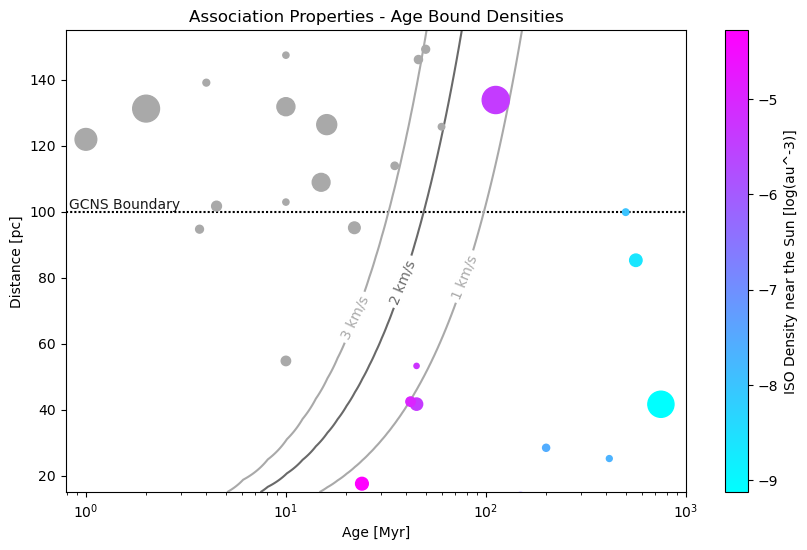

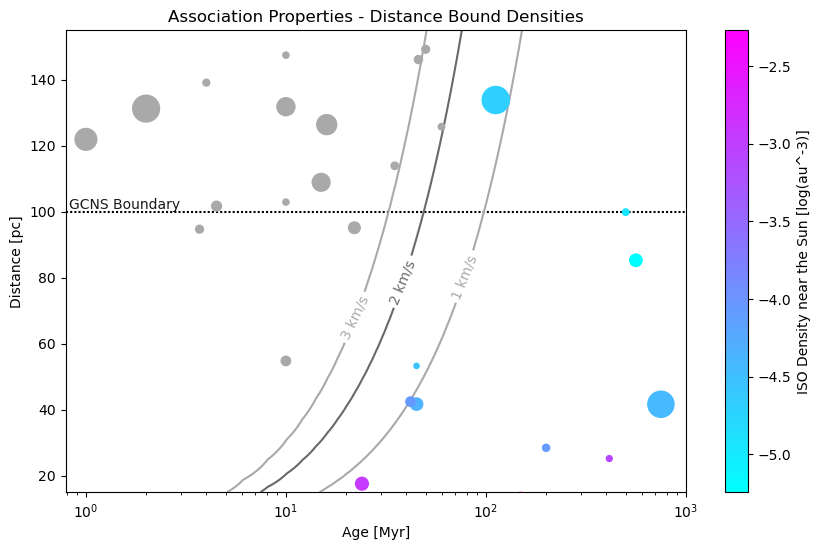

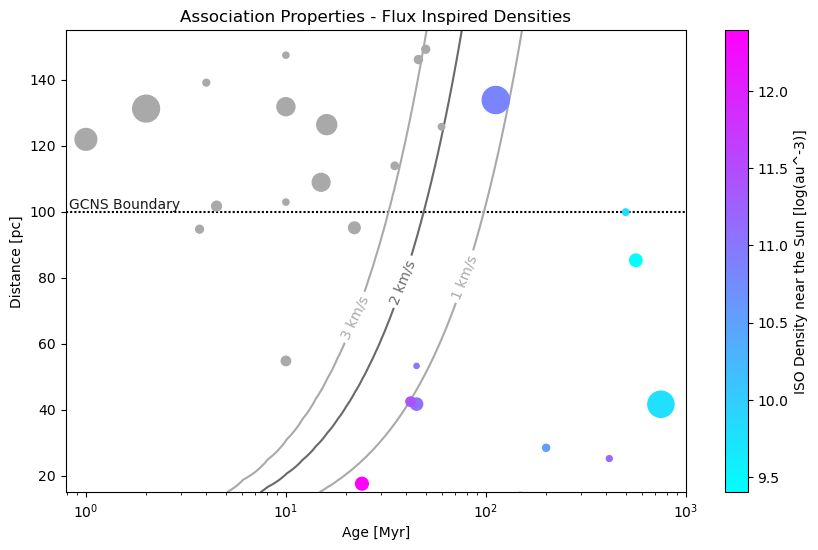

In [23]:
make_density_plot(data['num_density_lower'], title = 'Association Properties - Age Bound Densities')
make_density_plot(data['num_density_higher'], title = 'Association Properties - Distance Bound Densities')
make_density_plot(data['num_density_flux'], title = 'Association Properties - Flux Inspired Densities')